## Topic Modelling: 

- Topic modeling is a type of statistical modeling that uses unsupervised Machine Learning to identify clusters or groups of similar words within a body of text. This text mining method uses semantic structures in text to understand unstructured data without predefined tags or training data

![picture](https://dezyre.gumlet.io/images/blog/topic-modeling-nlp/Topic_Modeling_with_NLP.png?w=400&dpr=2.6)

In [1]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
documents = pd.read_csv('news-data.csv', error_bad_lines=False)
documents.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [3]:
documents.shape

(1103663, 2)

In [4]:
documents["headline_text"].nunique()

1076219

In [5]:
documents.isnull().sum()

publish_date     0
headline_text    0
dtype: int64

In [8]:
documents=documents[["headline_text"]].drop_duplicates()

In [9]:
documents.shape

(1076219, 1)

In [10]:
documents["headline_text"][0]

'aba decides against community broadcasting licence'

## Distribution of length of these headlines

In [11]:
documents["length"]=documents["headline_text"].apply(lambda x:len(x.split()))
documents.head()

,headline_text,length
0,aba decides against community broadcasting lic...,6
1,act fire witnesses must be aware of defamation,8
2,a g calls for infrastructure protection summit,7
3,air nz staff in aust strike for pay rise,9
4,air nz strike to affect australian travellers,7


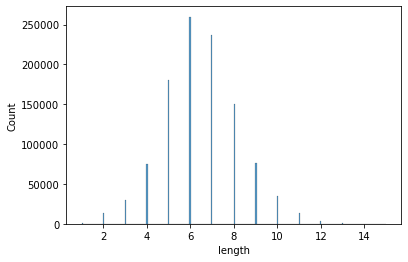

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(documents["length"])
plt.show()

## Top 20 most frequent words

In [19]:
all_sentences=" ".join(documents["headline_text"].tolist()).split()
all_sentences

['aba', 'decides', 'against', 'community', 'broadcasting']

In [20]:
from collections import Counter
words_counts=Counter(all_sentences)

In [22]:
words_counts.most_common(20)

[('to', 213474),
 ('in', 134849),
 ('for', 129594),
 ('of', 80416),
 ('on', 72625),
 ('over', 49904),
 ('the', 48575),
 ('police', 35078),
 ('at', 31612),
 ('after', 29480),
 ('new', 29003),
 ('with', 28755),
 ('man', 27172),
 ('a', 24613),
 ('and', 21994),
 ('up', 20793),
 ('as', 20458),
 ('says', 19978),
 ('from', 18990),
 ('by', 17656)]

## After StopWords Removal

In [23]:
import nltk
from nltk.corpus import stopwords

In [25]:
ls=stopwords.words('english')

In [27]:
documents["headline_text_cleaned"]=documents["headline_text"].apply(lambda x:" ".join([i for i in x.split() if i not in ls]))

In [28]:
documents.head()

,headline_text,length,headline_text_cleaned
0,aba decides against community broadcasting lic...,6,aba decides community broadcasting licence
1,act fire witnesses must be aware of defamation,8,act fire witnesses must aware defamation
2,a g calls for infrastructure protection summit,7,g calls infrastructure protection summit
3,air nz staff in aust strike for pay rise,9,air nz staff aust strike pay rise
4,air nz strike to affect australian travellers,7,air nz strike affect australian travellers


In [30]:
documents["length"]=documents["headline_text_cleaned"].apply(lambda x:len(x.split()))
documents.head()

,headline_text,length,headline_text_cleaned
0,aba decides against community broadcasting lic...,5,aba decides community broadcasting licence
1,act fire witnesses must be aware of defamation,6,act fire witnesses must aware defamation
2,a g calls for infrastructure protection summit,5,g calls infrastructure protection summit
3,air nz staff in aust strike for pay rise,7,air nz staff aust strike pay rise
4,air nz strike to affect australian travellers,6,air nz strike affect australian travellers


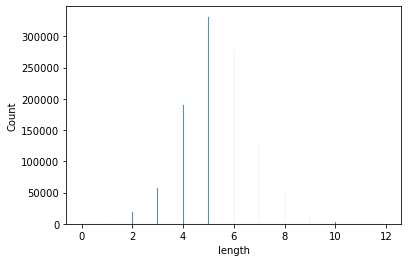

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(documents["length"])
plt.show()

In [32]:
all_sentences=" ".join(documents["headline_text_cleaned"].tolist()).split()
from collections import Counter
words_counts=Counter(all_sentences)
words_counts.most_common(20)

[('police', 35078),
 ('new', 29003),
 ('man', 27172),
 ('says', 19978),
 ('us', 17407),
 ('govt', 16910),
 ('council', 16293),
 ('court', 16184),
 ('fire', 13702),
 ('nsw', 12855),
 ('plan', 12286),
 ('australia', 12112),
 ('water', 11801),
 ('qld', 11715),
 ('wa', 11426),
 ('death', 11031),
 ('crash', 10753),
 ('sydney', 10487),
 ('health', 10258),
 ('australian', 10157)]

In [33]:
# use tfidf by removing tokens that don't appear in at least 50 documents
vect = TfidfVectorizer(min_df=50, stop_words='english')
 
# Fit and transform
X = vect.fit_transform(documents.headline_text)

In [34]:
X.shape

(1076219, 11141)

![picture](https://lh4.googleusercontent.com/FvUGnhGjYVFUY-K1pZxIrgPJKElEKxdnaX1GfDg3suLoMY5KUzgXKRsqcs-pDso-NXGyGdkq9r6S81G2Nc5zRaEQtQ88OfBSgMzRBk3RiZTXANxTYFzTLeWEoEZTOhxPH1UYCwqd)

In [38]:
# Create an NMF instance: model
# the 5 components will be the topics
model = NMF(n_components=5, random_state=5)
 
# Fit the model to TF-IDF
model.fit(X)

NMF(n_components=5, random_state=5)

In [39]:
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(X)

In [41]:
nmf_features.shape

(1076219, 5)

In [42]:
model.components_.shape

(5, 11141)

In [ ]:
#documents 1076219
#topics 5
#features (words) 11141

In [43]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())
components_df

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,01,02,03,04,05,06,07,08,09,...,zimbabwean,zimbabwes,zinc,zinifex,zoe,zone,zones,zoning,zoo,zuma
0,0.000517,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000252,0.000000,0.000042,0.000000,0.001319,0.002856,0.000000,0.000000,0.009092,0.000000
1,0.000681,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001804,0.000195,0.000000,0.000000,0.000158,0.006393,0.002626,0.000000,0.000000,0.000000
2,0.000022,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000306,0.000440,0.000048,0.000000,0.007135,0.008004,0.001172,0.020383,0.000515
3,0.002704,0.005943,0.01359,0.010996,0.010697,0.008986,0.009278,0.006531,0.008561,0.010822,...,0.002485,0.002780,0.002522,0.001759,0.001601,0.036688,0.015976,0.005718,0.012310,0.001647
4,0.000772,0.000000,0.00000,0.000000,0.000056,0.000000,0.000000,0.000351,0.000000,0.000000,...,0.002905,0.000637,0.000000,0.000512,0.001087,0.001583,0.000102,0.000000,0.001220,0.003448


In [44]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
man         7.842989
charged     2.874227
murder      1.228885
crash       1.077560
dies        1.059755
jailed      0.877675
car         0.810381
stabbing    0.650639
missing     0.649287
guilty      0.621733
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
police         7.273933
probe          0.846202
investigate    0.807370
missing        0.631009
search         0.629721
death          0.501805
car            0.447389
hunt           0.425903
crash          0.407507
officer        0.353271
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
new          7.022154
zealand      0.467464
laws         0.333147
year         0.298963
home         0.217019
york         0.202951
hospital     0.201646
centre       0.200862
deal         0.185725
australia    0.167608
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
govt       2.262823
council    1.844362
says       1

In [45]:
news = """15-year-old girl stabbed to death in grocery store during fight with 4 younger girls
Authorities said they gathered lots of evidence from videos on social media"""

In [46]:
# Transform the TF-IDF
# Transform the TF-IDF: nmf_features

In [48]:
x=vect.transform([news])

In [50]:
nmf_features=model.transform(x)

In [55]:
pd.DataFrame(nmf_features).idxmax(axis=1)[0]+1

4